# Sensitivity Experiments evaluating the role of wind and buoyancy fluxes on the AMOC

## Part 1 - Preparation

### 1.1 Tech Preamble

In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy 
import cartopy.crs as ccrs
import warnings
import cmocean.cm as cm
import cmocean.tools as cmt
from matplotlib.colors import ListedColormap
warnings.filterwarnings("ignore")

### 1.2 Load Data

In [2]:
ref_amoc_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast_1m_19580101_20161231_diaptr.nc'
ref_psi_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast_1m_19580101_20161231_psi.nc'
thc_amoc_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K004.thermhal90_1m_19580101_20181231_diaptr.nc'
thc_psi_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K004.thermhal90_1m_19580101_20161231_psi.nc'
wind_amoc_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K005.wind90_1m_19580101_20161231_diaptr.nc'
wind_psi_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K005.wind90_1m_19580101_20161231_psi.nc'
clim_amoc_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.JRA.XIOS2-KPW001.RYF90_1m_19580101_20161231_diaptr.nc'
clim_psi_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.JRA.XIOS2-KPW001.RYF90_1m_19580101_20161231_psi.nc'

In [3]:
ref_amoc = xr.open_dataset(ref_amoc_pat).zomsfatl.isel(y = slice(0,1020)).squeeze()
#ref_psi = xr.open_dataset(ref_psi_pat)
thc_amoc = xr.open_dataset(thc_amoc_pat).zomsfatl.isel(y = slice(0,1020)).squeeze()
#thc_psi = xr.open_dataset(thc_psi_pat)
wind_amoc = xr.open_dataset(wind_amoc_pat).zomsfatl.isel(y = slice(0,1020)).squeeze()
#wind_psi = xr.open_dataset(wind_psi_pat)
clim_amoc = xr.open_dataset(clim_amoc_pat).zomsfatl.isel(y = slice(0,1020)).squeeze()
#clim_psi = xr.open_dataset(clim_psi_pat)
clim_amoc

#Ich wähle hier schon zomsfatl aus und  slice den letzten y-Wert weg und squeeze die eine komische x-Dimension weg
#damit das später beim Plotten nicht jedes mal gemacht werden muss

<xarray.DataArray 'zomsfatl' (time_counter: 708, depthw: 46, y: 1020)>
[33219360 values with dtype=float32]
Coordinates:
    nav_lat        (y) float32 ...
    nav_lon        (y) float32 ...
  * depthw         (depthw) float32 0.0 6.194 12.84 ... 5.5e+03 5.75e+03
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 1958-01-16T12:00:00 ... 2016...
Dimensions without coordinates: y
Attributes:
    long_name:           Meridional Stream-Function: Atlantic
    units:               Sv
    online_operation:    average
    interval_operation:  1350 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1350 s)

In [4]:
#Set lat, lon as coordinates
#ref_psi = ref_psi.set_coords(('nav_lon', 'nav_lat'))
#thc_psi = thc_psi.set_coords(('nav_lon', 'nav_lat'))
#wind_psi = wind_psi.set_coords(('nav_lon', 'nav_lat'))
#clim_psi = clim_psi.set_coords(('nav_lon', 'nav_lat'))


### 1.3 Take Time Mean

In [5]:
#Nur einmal ausfuehren!!
wind_amoc_mean = wind_amoc.mean('time_counter')
thc_amoc_mean = thc_amoc.mean('time_counter')
clim_amoc_mean = clim_amoc.mean('time_counter')
ref_amoc_mean = ref_amoc.mean('time_counter')

### 1.4 Creating a mask - which semi - worked - can definately be improved

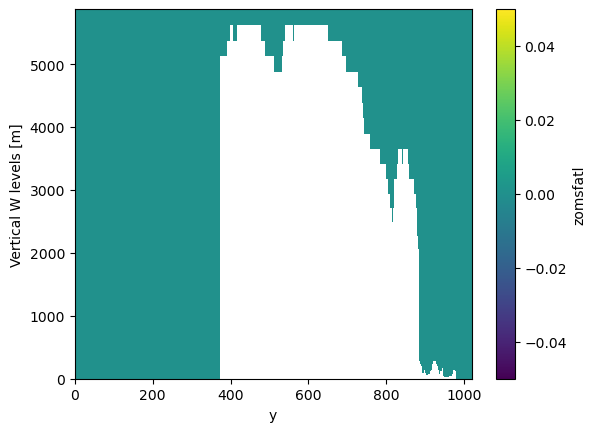

In [6]:
mask = clim_amoc_mean.where(clim_amoc_mean == 0)
#ist True wo Daten == 0 sind (also Meeresboden usw.)
#ist NaN und damit durchsichtig überall sonst
mask.plot.pcolormesh()

## Part 2 - Plotting

### 2.1 Plot Time Means

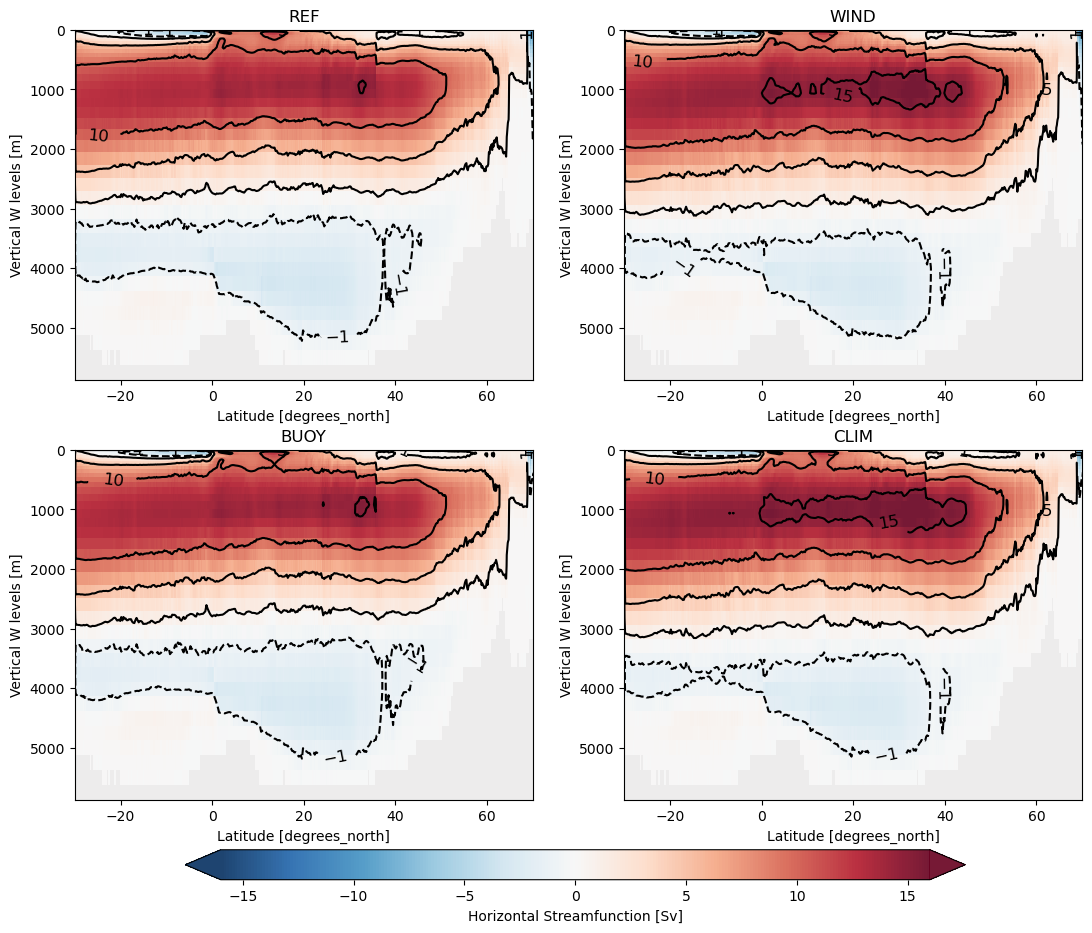

In [7]:
amoc_list = [ref_amoc_mean, wind_amoc_mean, thc_amoc_mean, clim_amoc_mean]
title_list = ['REF', 'WIND', 'BUOY', 'CLIM']
fig, ax = plt.subplots(2,2, figsize = (13, 10))
levels1 = [1, 5, 10, 15];
levels2 = [-1 ]

for i, ax in enumerate(fig.axes):
    
    mask.plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys', alpha=1)
    p = amoc_list[i].plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, vmax = 16, alpha = 0.9)
    contour1 = amoc_list[i].plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels1, clabel = True)
    contour2 = amoc_list[i].plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels2)
    
    plt.clabel(contour1, inline=True, fontsize=12)
    plt.clabel(contour2, inline=True, fontsize=12)

    
    
    ax.invert_yaxis()
    ax.set_xlim((-30,70))
    ax.set_title(title_list[i]);

cbar_ax = fig.add_axes([0.21, 0.03, 0.6, 0.03])
cb = fig.colorbar(p, cax = cbar_ax, orientation = 'horizontal', extend = 'both')
cbar_ax.set_xlabel('Horizontal Streamfunction [Sv]');

#plt.savefig('overview.png')
#plt.savefig('pics/amoc_overview', dpi = 300, bbox_inches = 'tight')

#### 2.1.1 Plot Difference betweeen Runs - REF

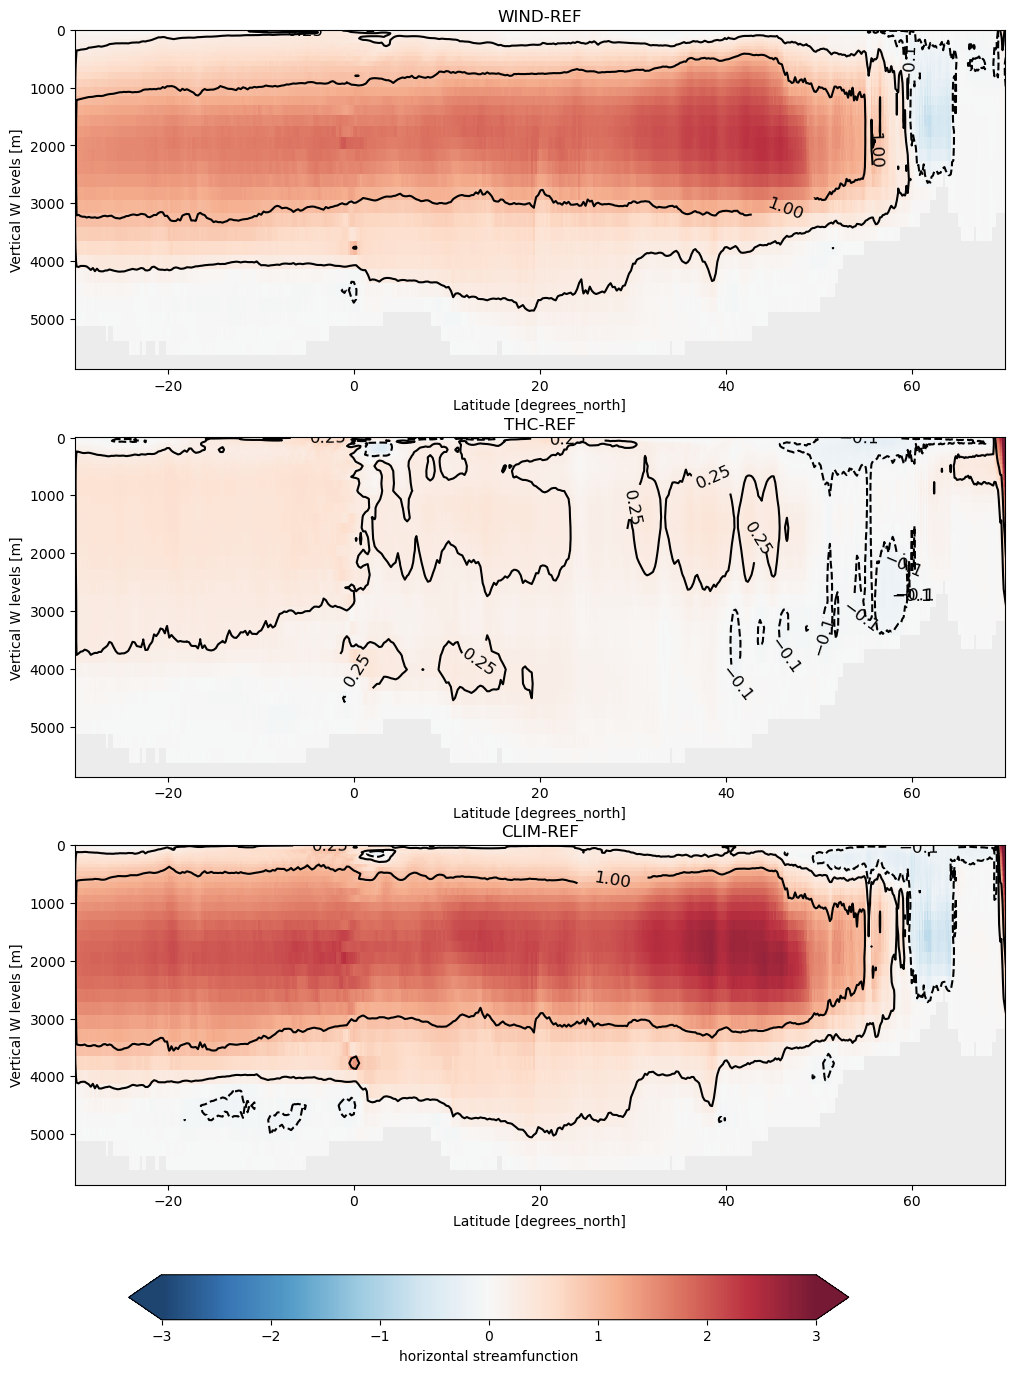

In [8]:
amoc_list = [wind_amoc_mean-ref_amoc_mean, thc_amoc_mean-ref_amoc_mean, clim_amoc_mean-ref_amoc_mean]
title_list = ['WIND-REF', 'THC-REF', 'CLIM-REF']
levels1 = [.25, 1]
levels2 = [-.1]

fig, ax = plt.subplots(3,1, figsize = (12, 15))

for i, ax in enumerate(fig.axes):
    
    mask.plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys', alpha=1)
    p = amoc_list[i].plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, vmax = 3, alpha = .9)
    contour1 = amoc_list[i].plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels1, clabel = True)
    contour2 = amoc_list[i].plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels2)
    plt.clabel(contour1, inline=True, fontsize=12)
    plt.clabel(contour2, inline=True, fontsize=12)

    ax.invert_yaxis()
    ax.set_xlim((-30,70)) #-30,70
    # ax.set_ylim((100, 0)) 
    ax.set_title(title_list[i]);


cbar_ax = fig.add_axes([0.17, 0.02, 0.6, 0.03])
cb = fig.colorbar(p, cax = cbar_ax, orientation = 'horizontal', extend = 'both')
cbar_ax.set_xlabel('horizontal streamfunction');

#plt.close()

#### 2.1.2 Plot Difference between Runs - CLIM 

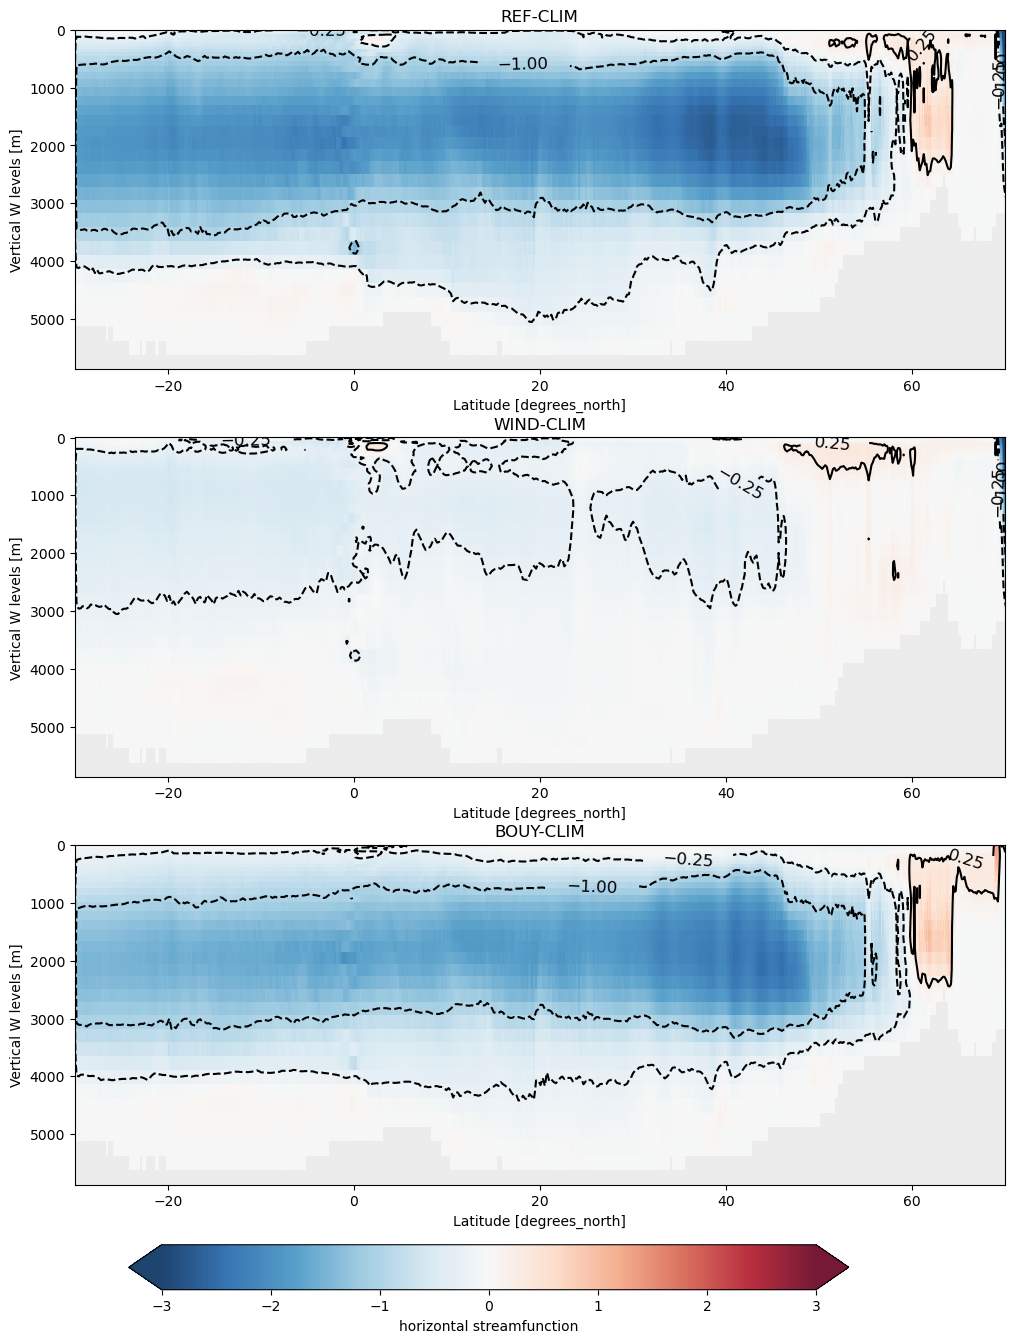

In [9]:
amoc_list = [ref_amoc_mean-clim_amoc_mean, wind_amoc_mean-clim_amoc_mean, thc_amoc_mean-clim_amoc_mean]
title_list = ['REF-CLIM', 'WIND-CLIM', 'BOUY-CLIM']
fig, ax = plt.subplots(3,1, figsize = (12, 15))
levels1 = [.25]
levels2 = [-.25,-1]


for i, ax in enumerate(fig.axes):
    
    mask.plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys', alpha=1)
    p = amoc_list[i].plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, vmax = 3, alpha = .9)
    contour1 = amoc_list[i].plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels1, clabel = True)
    contour2 = amoc_list[i].plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels2)
    plt.clabel(contour1, inline=True, fontsize=12)
    plt.clabel(contour2, inline=True, fontsize=12)

    
    ax.invert_yaxis()
    ax.set_xlim((-30,70)) #-30,70
    # ax.set_ylim((100, 0)) 
    ax.set_title(title_list[i]);


cbar_ax = fig.add_axes([0.17, 0.04, 0.6, 0.03])
cb = fig.colorbar(p, cax = cbar_ax, orientation = 'horizontal', extend = 'both')
cbar_ax.set_xlabel('horizontal streamfunction');

#plt.savefig('minus_clim.png')

### 2.2. Time series showing the interannual to decadal Variability

#### 2.2.1 Lab Sea - Mean over Box

In [10]:
from matplotlib.patches import Rectangle

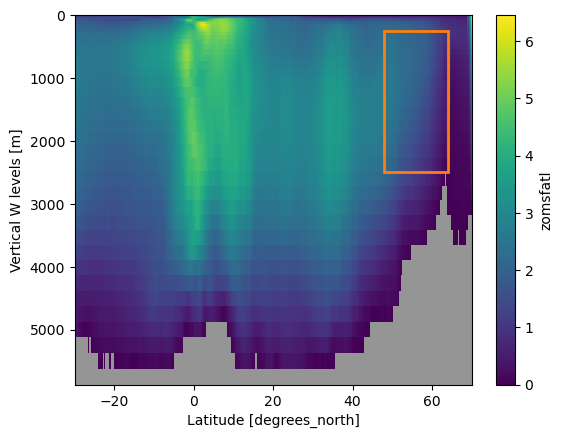

In [11]:

#Plot

x_start = 31#golf
x_end = 50
y_start = 250
y_end = 3000

width = x_end - x_start
height = y_end - y_start

rect1 = Rectangle((x_start, y_start), width, height, linewidth=2, edgecolor='green', facecolor='none')


x_start = 48#LAb sea  ? passt die box?
x_end = 64
y_start = 250
y_end = 2500

width = x_end - x_start
height = y_end - y_start

rect2 = Rectangle((x_start, y_start), width, height, linewidth=2, edgecolor='tab:orange', facecolor='none')



foo = ref_amoc_mean

fig, ax = plt.subplots(1,1)

ref_amoc.std('time_counter').plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = True)
mask.plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys')
ax.invert_yaxis()
ax.set_xlim((-30,70)) #-30,70 
#ax.add_patch(rect1);
ax.add_patch(rect2);

In [12]:
#x_start = 31
#x_end = 50
#y_start = 250
#y_end = 3000

#width = x_end - x_start
#height = y_end - y_start

#rect1 = Rectangle((x_start, y_start), width, height, linewidth=2, edgecolor='green', facecolor='none')

#Lab Sea window 
lat_ind = np.where((ref_amoc.nav_lat>=x_start) & (ref_amoc.nav_lat<=x_end))[0]
z_ind = np.where((ref_amoc.depthw>=y_start) & (ref_amoc.depthw<=y_end))[0] #bistimmen der Indices in der Box
z_ind

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [13]:
#Take Spatial mean over the box

#i = np.where((ref_amoc['nav_lat'] > x_start) & (ref_amoc['nav_lat'] < x_end))

#ref_amoc_gs = ref_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
#ref_amoc_gs = ref_amoc_gs.mean(dim=['y', 'depthw'])

#wind_amoc_gs = wind_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
#wind_amoc_gs = wind_amoc_gs.mean(dim=['y', 'depthw'])

#thc_amoc_gs = thc_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
#thc_amoc_gs = thc_amoc_gs.mean(dim=['y', 'depthw'])

#clim_amoc_gs = clim_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
#clim_amoc_gs = clim_amoc_gs.mean(dim=['y', 'depthw'])

#Lab sea box
ref_amoc_lab = ref_amoc.isel(y = lat_ind,depthw = z_ind).mean(dim=['y', 'depthw']) #eig. genau wie oben
wind_amoc_lab = wind_amoc.isel(y = lat_ind,depthw = z_ind).mean(dim=['y', 'depthw'])
thc_amoc_lab = thc_amoc.isel(y = lat_ind,depthw = z_ind).mean(dim=['y', 'depthw'])
clim_amoc_lab = clim_amoc.isel(y = lat_ind,depthw = z_ind).mean(dim=['y', 'depthw'])

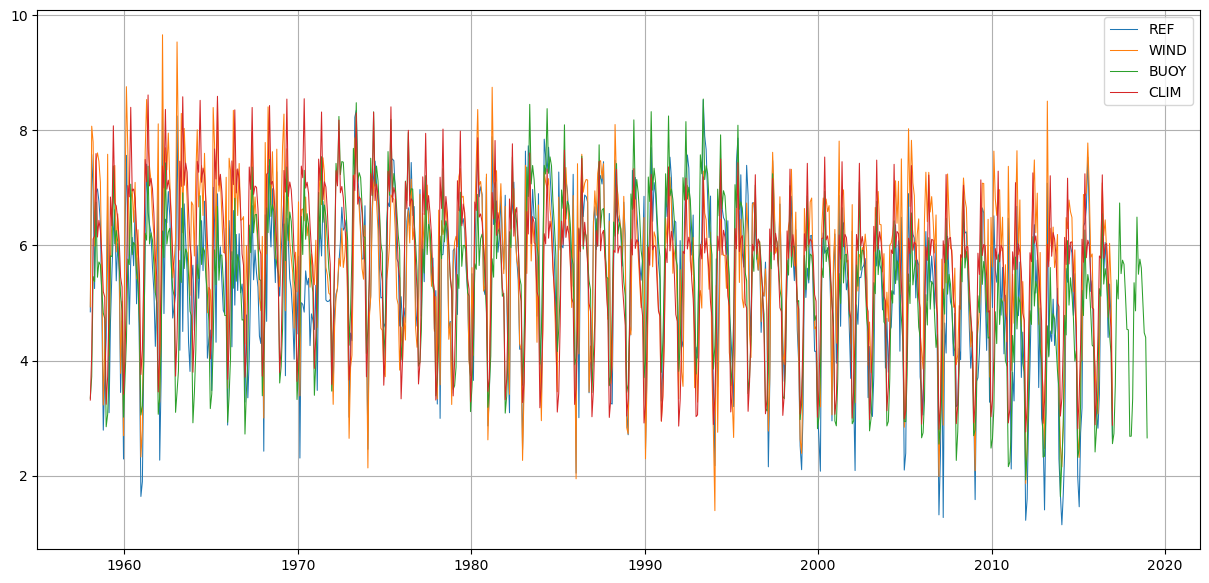

In [14]:
n = .75;


fig, ax = plt.subplots(1,1, figsize = (15, 7))

plt.plot(ref_amoc_lab.time_counter, ref_amoc_lab, label = 'REF', linewidth = n)
plt.plot(wind_amoc_lab.time_counter, wind_amoc_lab, label = 'WIND', linewidth = n)
plt.plot(thc_amoc_lab.time_counter, thc_amoc_lab, label = 'BUOY', linewidth = n)
plt.plot(clim_amoc_lab.time_counter, clim_amoc_lab, label = 'CLIM', linewidth = n)
plt.legend()
plt.grid()


In [15]:
#def moving_average(x, w): #wwindowsize in months
#    return np.convolve(x, np.ones(w), 'valid') / w

def smooth_arr(arr,window_size = 23):
    
    window = np.hanning(window_size)

    padded_arr = np.pad(arr, (window_size // 2, window_size // 2), mode='edge')

    smooth_arr = np.convolve(padded_arr, window, mode='valid')
    #scale to unfiltered data
    scaling_factor = np.nanmean(arr) / np.nanmean(smooth_arr)
    
    return smooth_arr* scaling_factor

#hanning window anstatt boxcar window
#scaling, sodass das gefilterte mean gleich dem ungefilterten mean ist 
#-> Größenordnung des Transportes bleibt erhalten

In [16]:
#ref_amoc_gs_filt = moving_average(ref_amoc_gs['zomsfatl'].isel(x = 0), 12)
#wind_amoc_gs_filt = moving_average(wind_amoc_gs['zomsfatl'].isel(x = 0), 12)
#thc_amoc_gs_filt = moving_average(thc_amoc_gs['zomsfatl'].isel(x = 0), 12)
#clim_amoc_gs_filt = moving_average(clim_amoc_gs['zomsfatl'].isel(x = 0), 12)

ref_lab_filt = smooth_arr(ref_amoc_lab)
wind_lab_filt = smooth_arr(wind_amoc_lab)
thc_lab_filt = smooth_arr(thc_amoc_lab)
clim_lab_filt = smooth_arr(clim_amoc_lab)

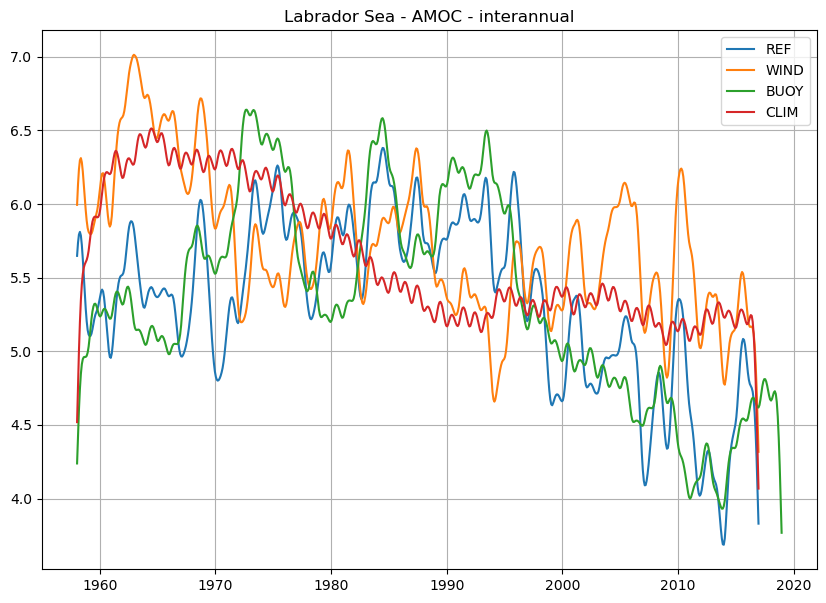

In [17]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

plt.plot(ref_amoc_lab.time_counter, ref_lab_filt, label = 'REF')
plt.plot(wind_amoc_lab.time_counter, wind_lab_filt, label = 'WIND')
plt.plot(thc_amoc_lab.time_counter, thc_lab_filt, label = 'BUOY')
plt.plot(clim_amoc_lab.time_counter, clim_lab_filt, label = 'CLIM')
ax.legend()
ax.grid()
ax.set_title('Labrador Sea - AMOC - interannual')

plt.savefig('lab_time.png')

Text(0.5, 1.0, 'Labrador Sea - AMOC - decadal')

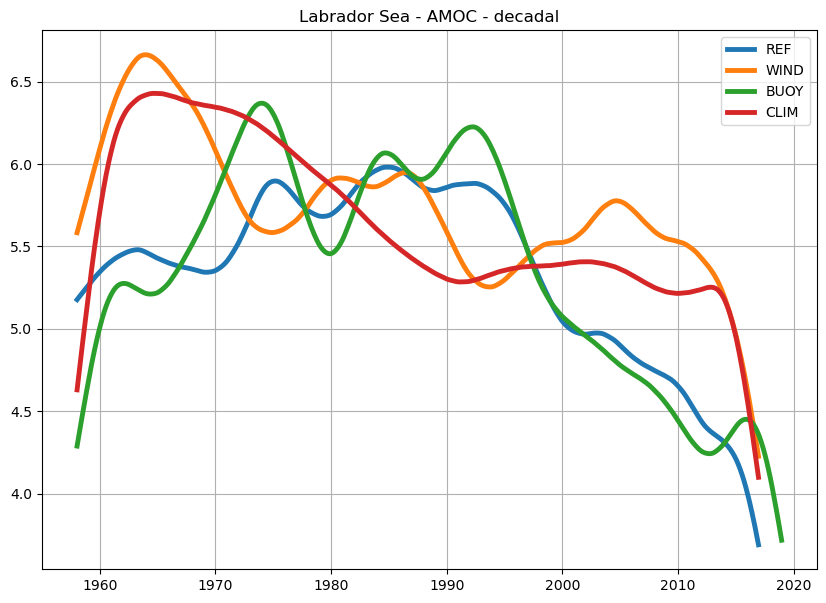

In [18]:
#Für decadal window_size = 115 (119?)

ref_lab_filt2 = smooth_arr(ref_amoc_lab,115)
wind_lab_filt2 = smooth_arr(wind_amoc_lab,115)
thc_lab_filt2 = smooth_arr(thc_amoc_lab,115)
clim_lab_filt2 = smooth_arr(clim_amoc_lab,115)

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

plt.plot(ref_amoc_lab.time_counter, ref_lab_filt2, label = 'REF', lw = 3.5)
plt.plot(wind_amoc_lab.time_counter, wind_lab_filt2, label = 'WIND',lw = 3.5)
plt.plot(thc_amoc_lab.time_counter, thc_lab_filt2, label = 'BUOY',lw = 3.5)
plt.plot(clim_amoc_lab.time_counter, clim_lab_filt2, label = 'CLIM',lw = 3.5)
ax.legend()
ax.grid()
ax.set_title('Labrador Sea - AMOC - decadal')

#### 2.2.2 Labrador Sea - Find max in Box

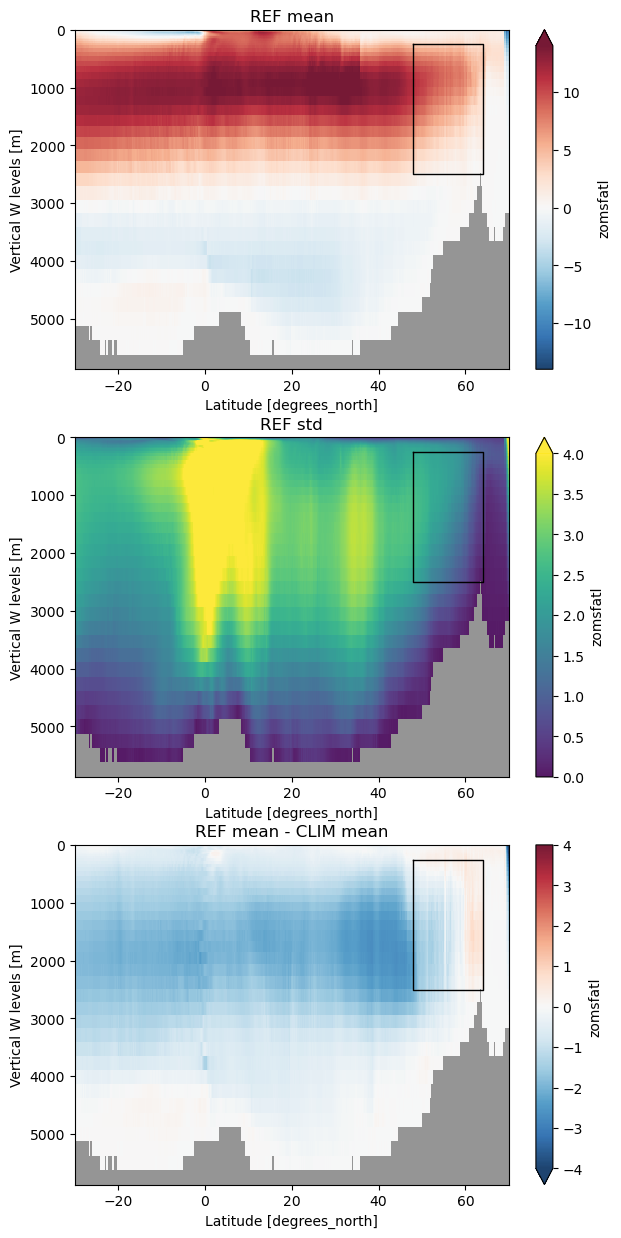

In [19]:
# Select Box

#x_start = 59
#x_end = 64
#y_start = 20
#y_end = 2800
x_start = 48 #Box von weiter oben
x_end = 64   #Latitudes from Barotropic streamfunction Box; large differences between REF and CLIM runs 
y_start = 250 #depths around maximum; reaches down to areas of high variability in interannual and decadal timescales (check Felix's 3by3 plot)? 
y_end = 2500 # ergibt das Sinn für die Box Auswahl?

#listen für x und y koordinaten der Box
lab_x_list = [x_start,x_start,x_end,x_end,x_start ] #5 koordinaten um den loop zu schließen
lab_y_list = [y_start,y_end,y_end,y_start,y_start]

title_list = ['REF mean','REF std', 'REF mean - CLIM mean']
#Plot
foo = ref_amoc_mean - clim_amoc_mean;

fig, ax = plt.subplots(3,1,figsize = (7,15))

ref_amoc_mean.plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax[0], add_colorbar = True, vmax = 14, alpha = .9)

ref_amoc.std('time_counter').plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax[1], add_colorbar = True, vmax = 4, alpha = .9)

foo.plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax[2], add_colorbar = True, vmax = 4, alpha = .9)

for i in range(3):
    mask.plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax[i], add_colorbar = False, cmap = 'Greys', alpha=1)
    ax[i].set_title(title_list[i])
    ax[i].invert_yaxis()
    ax[i].set_xlim((-30,70)) #-30,70 
    ax[i].plot(lab_x_list,lab_y_list, lw = 1, color = '00')

In [20]:
ref_slice_lab = ref_amoc.isel(y = lat_ind,depthw = z_ind)
wind_slice_lab = wind_amoc.isel(y = lat_ind,depthw = z_ind)
thc_slice_lab = thc_amoc.isel(y = lat_ind,depthw = z_ind)
clim_slice_lab = clim_amoc.isel(y = lat_ind,depthw = z_ind)

ref_slice_lab #genau wie ref_amoc_lab nur nicht über lat und z gemittelt

<xarray.DataArray 'zomsfatl' (time_counter: 708, depthw: 16, y: 104)>
array([[[ 4.880445,  4.772087, ...,  2.043022,  2.110762],
        [ 6.047197,  5.94622 , ...,  2.616168,  2.771732],
        ...,
        [ 3.306709,  3.28712 , ...,  1.008085,  1.021036],
        [ 1.753929,  1.712874, ...,  0.428975,  0.509802]],

       [[ 7.874035,  7.738765, ...,  3.296624,  3.107725],
        [ 9.050545,  8.897754, ...,  3.829374,  3.633269],
        ...,
        [ 4.609476,  4.559756, ...,  0.956321,  0.829172],
        [ 2.809164,  2.738107, ...,  0.34955 ,  0.447459]],

       ...,

       [[ 5.096101,  5.139502, ...,  1.301595,  1.560152],
        [ 6.259241,  6.3118  , ...,  1.852947,  2.044665],
        ...,
        [ 5.800849,  5.765236, ...,  0.614097,  0.493885],
        [ 4.3267  ,  4.303647, ...,  0.187963,  0.198117]],

       [[ 1.659915,  1.455288, ...,  2.363711,  2.610876],
        [ 2.665164,  2.481196, ...,  2.880269,  3.262505],
        ...,
        [ 1.234164,  0.931036, ...,  0.726505,  0.798613],
        [-0.048792, -0.235658, ...,  0.281023,  0.386068]]], dtype=float32)
Coordinates:
    nav_lat        (y) float32 48.15 48.32 48.5 48.67 ... 63.65 63.78 63.92
    nav_lon        (y) float32 ...
  * depthw         (depthw) float32 295.4 350.9 416.0 ... 2.16e+03 2.375e+03
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 1958-01-16T12:00:00 ... 2016...
Dimensions without coordinates: y
Attributes:
    long_name:           Meridional Stream-Function: Atlantic
    units:               Sv
    online_operation:    average
    interval_operation:  1350 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1350 s)

(40.0, 70.0)

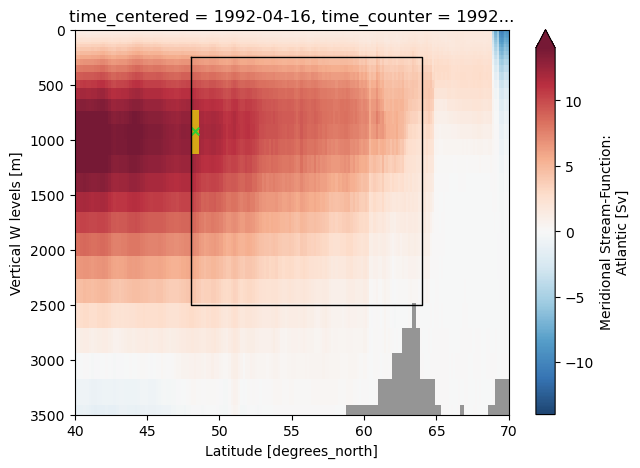

In [21]:
# suche max in einem eiznigen Zeitschritt für Beispiel

dst = ref_slice_lab.isel(time_counter = 411)
dst_ = dst.isel(depthw = slice(1,-1), y = slice(1,-1))#um eine reihe rundherum kleiner machen, sodass die 8 Werte um den Max wert auch alle in der Box sind

argmax_arr = dst_.max() #

max_ilat = np.unravel_index(dst_.argmax(), dst_.shape)[1]
max_iz = np.unravel_index(dst_.argmax(), dst_.shape)[0]

lat_max = dst_.coords['nav_lat'].values[max_ilat]
z_max = dst_.coords['depthw'].values[max_iz]

#max 9 slices 
max9 = dst.isel(y = slice(max_ilat,max_ilat+3),
                depthw = slice(max_iz,max_iz+3))

#plot snapshot
#for plots
#
fig, ax = plt.subplots(1,1,figsize = (7,5))

ref_amoc.isel(time_counter = 511).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = True, vmax = 14, alpha = .9)
mask.plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys', alpha=1)

max9.plot.pcolormesh(x = 'nav_lat',y = 'depthw',  ax = ax, add_colorbar = False,
                            cmap = ListedColormap(['yellow']),  alpha = .6)
ax.plot(lab_x_list,lab_y_list, lw = 1, color = '00')  
ax.scatter(lat_max,z_max, s = 30, marker = 'x', color = 'limegreen')
ax.set_ylim(0,3500)
ax.invert_yaxis()
ax.set_xlim((40,70)) #-30,70 


In [22]:
#obere Zelle in Funtkion packen
def calc_amoc_ts(ds,ret_coords = False):
    #
    
    max_val = np.zeros(ds.shape[0])#time series value
    lat_max = np.zeros(ds.shape[0])#time series coordinates
    z_max = np.zeros(ds.shape[0])
    
    for i in range(ds.shape[0]): #loop over timesteps
        
        dst = ds.isel(time_counter =i)
        dst_ = dst.isel(depthw = slice(1,-1), y = slice(1,-1))

        max_ilat = np.unravel_index(dst_.argmax(), dst_.shape)[1]
        max_iz = np.unravel_index(dst_.argmax(), dst_.shape)[0]

        lat_max[i] = dst_.coords['nav_lat'].values[max_ilat]
        z_max[i] = dst_.coords['depthw'].values[max_iz]
        
        max_val[i] = dst.isel(y = slice(max_ilat,max_ilat+3),    #anstatt argmax() mitteln über die 8+1 umliegenden Gridpoints
                depthw = slice(max_iz,max_iz+3)).mean().values 
    
    if ret_coords:
        return max_val,lat_max,z_max
    else:
        return max_val

In [23]:
#funktion anwenden
ts_ref_lab,lat_max,z_max = calc_amoc_ts(ref_slice_lab, ret_coords = True) #coordinaten zeitreihe für verteilungsplot

ts_wind_lab = calc_amoc_ts(wind_slice_lab)
ts_thc_lab = calc_amoc_ts(thc_slice_lab)
ts_clim_lab = calc_amoc_ts(clim_slice_lab)

Text(0.5, 0, 'number of timesteps as max. location')

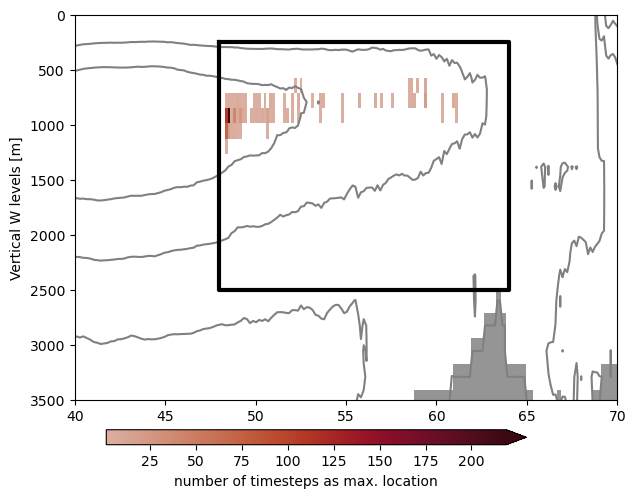

In [24]:
#verteilungs heatmap
new_cmap = cmt.crop_by_percent(cm.amp, 20, which='min', N=None)
lats = ref_slice_lab.coords['nav_lat'].values
zs = ref_slice_lab.coords['depthw'].values
z_bins = np.linspace(zs[0], zs[-1], 16)
lat_bins = np.linspace(lats[0], lats[-1], 104)#für heamtap müssen boxen gleichmäxig verteilt sein


heatm, xedges, yedges = np.histogram2d(lat_max, z_max, bins=(lat_bins, z_bins))
heatm = np.where(heatm > 0,heatm, np.nan)

fig, ax = plt.subplots(1,1,figsize = (7,5))

ref_amoc_mean.plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, vmax = 14, cmap = ListedColormap(['Grey']))
mask.plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys', alpha=1)
p = ax.pcolormesh(lat_bins,z_bins,heatm.T, cmap = new_cmap)
ax.plot(lab_x_list,lab_y_list, lw = 3, color = '00') 
ax.set_ylim(0,3500)
ax.invert_yaxis()
ax.set_xlim((40,70)) #-30,70 

cbar_ax = fig.add_axes([0.17, 0.02, 0.6, 0.03]) 
cb = fig.colorbar(p, cax = cbar_ax, orientation ='horizontal', extend = 'max')
cbar_ax.set_xlabel('number of timesteps as max. location')  # cax == cb.ax

### Timeseries mit max-Funktion  -  Vergleich

Text(0.5, 1.0, 'Labrador Sea - AMOC ')

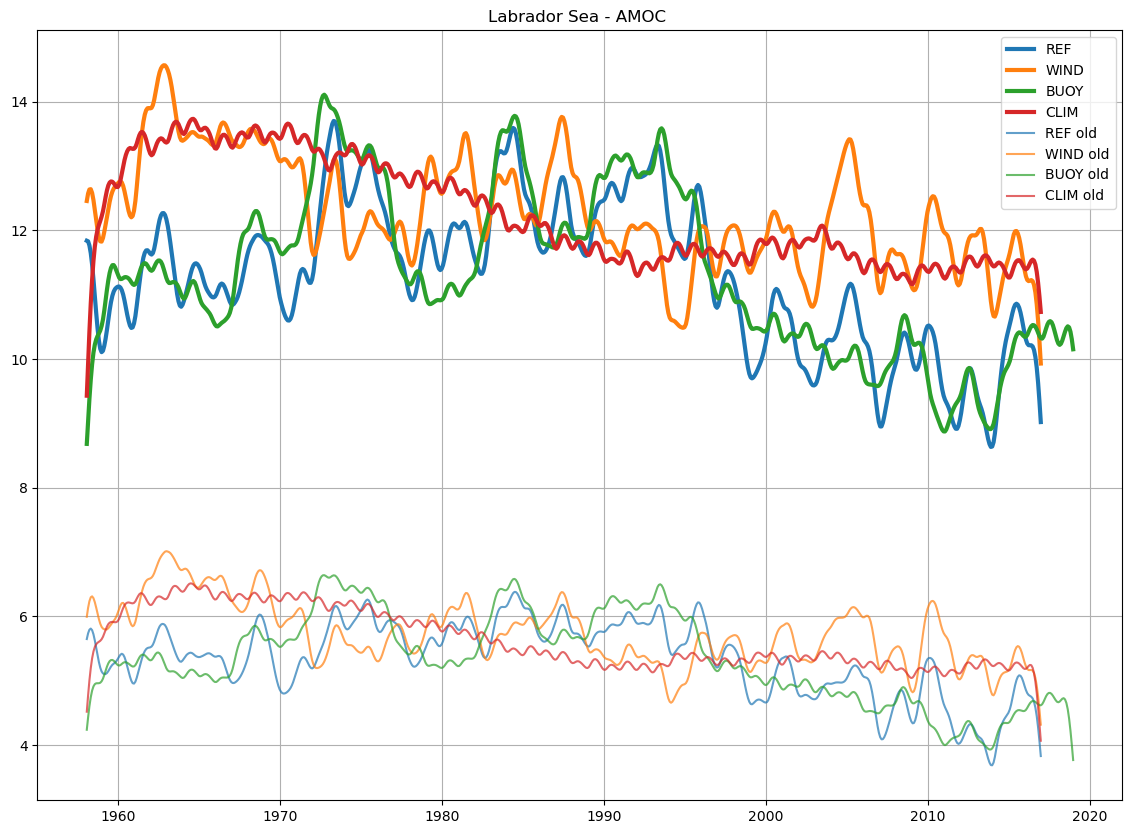

In [25]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_subplot(1,1,1)

#neue TS
plt.plot(ref_amoc_lab.time_counter,smooth_arr(ts_ref_lab), label = 'REF', lw = 3)
plt.plot(wind_amoc_lab.time_counter, smooth_arr(ts_wind_lab), label = 'WIND', lw = 3)
plt.plot(thc_amoc_lab.time_counter, smooth_arr(ts_thc_lab), label = 'BUOY', lw = 3)
plt.plot(clim_amoc_lab.time_counter, smooth_arr(ts_clim_lab), label = 'CLIM', lw = 3)

#alte TS
plt.plot(ref_amoc_lab.time_counter,ref_lab_filt, label = 'REF old', c = 'tab:blue', alpha = .7)
plt.plot(wind_amoc_lab.time_counter, wind_lab_filt, label = 'WIND old', c = 'tab:orange', alpha = .7)
plt.plot(thc_amoc_lab.time_counter, thc_lab_filt, label = 'BUOY old', c = 'tab:green', alpha = .7)
plt.plot(clim_amoc_lab.time_counter, clim_lab_filt, label = 'CLIM old', c = 'tab:red', alpha = .7)

ax.legend()
ax.grid()
ax.set_title('Labrador Sea - AMOC ')

Text(0.5, 1.0, 'Labrador Sea - AMOC Decadal ')

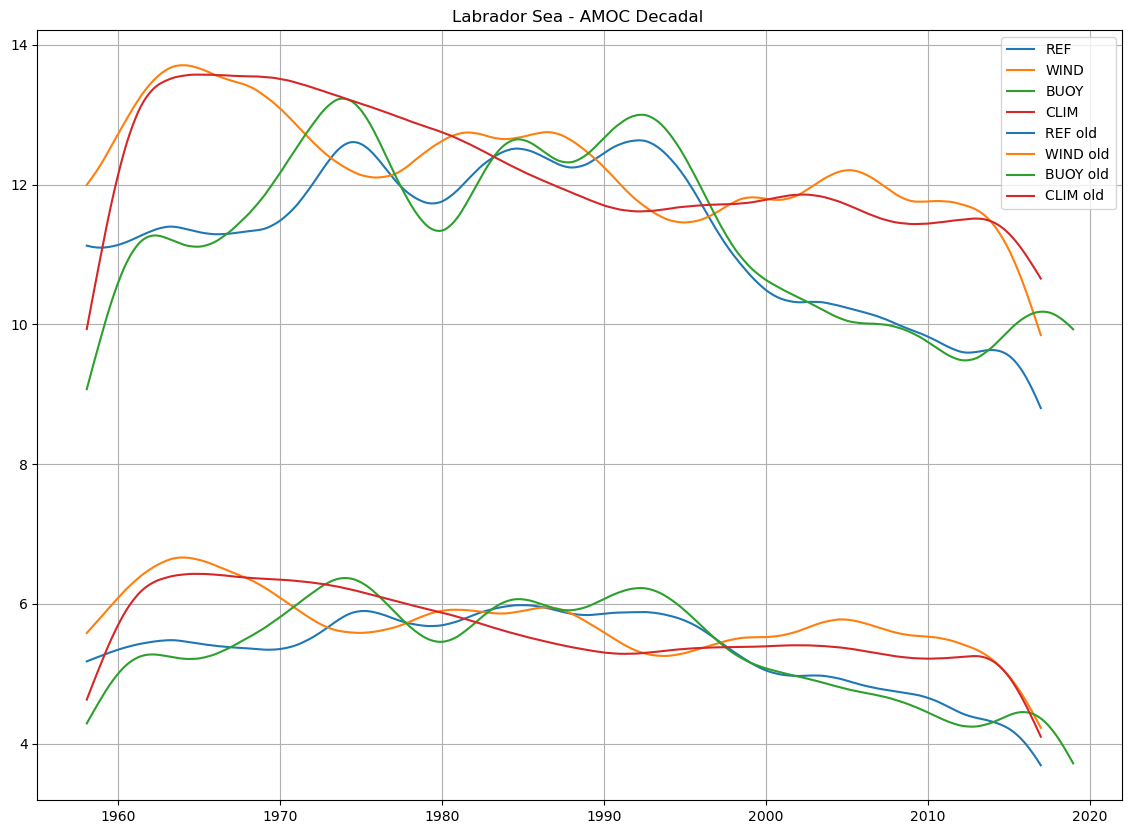

In [26]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_subplot(1,1,1)

#neue TS
plt.plot(ref_amoc_lab.time_counter,smooth_arr(ts_ref_lab,115), label = 'REF')
plt.plot(wind_amoc_lab.time_counter, smooth_arr(ts_wind_lab,115), label = 'WIND')
plt.plot(thc_amoc_lab.time_counter, smooth_arr(ts_thc_lab,115), label = 'BUOY')
plt.plot(clim_amoc_lab.time_counter, smooth_arr(ts_clim_lab,115), label = 'CLIM')

#alte TS
plt.plot(ref_amoc_lab.time_counter,ref_lab_filt2, label = 'REF old', c = 'tab:blue')
plt.plot(wind_amoc_lab.time_counter, wind_lab_filt2, label = 'WIND old', c = 'tab:orange')
plt.plot(thc_amoc_lab.time_counter, thc_lab_filt2, label = 'BUOY old', c = 'tab:green')
plt.plot(clim_amoc_lab.time_counter, clim_lab_filt2, label = 'CLIM old', c = 'tab:red')

ax.legend()
ax.grid()
ax.set_title('Labrador Sea - AMOC Decadal ')